<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/NBA_Data_Cleaning_and_Predict_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project: NBA Data Cleaning and Predict MACHINE LEARNING Model**

## Context:
- We have made minor changes on the data to fit this exercise such as changing the column names,

## Dataset description
- games: each game from 2004 to dec 2020, including information abouth the two teams in each game and some details like number of points.

 - teams - information about each team played in the games

**Importing Libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [45]:
games=pd.read_csv('/content/games.csv',encoding='unicode_escape')

In [46]:
teams=pd.read_csv('/content/teams.csv',encoding='unicode_escape')

In [47]:
games.head()

,GAME_DATE,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,POINTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,POINTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120,0.433,0.792,...,23,50,1610612766,117,0.444,0.864,0.439,21,52,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99,0.427,0.625,...,24,45,1610612765,96,0.402,0.647,0.326,18,51,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116,0.400,0.744,...,21,43,1610612737,117,0.422,0.837,0.297,24,47,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107,0.371,0.692,...,19,45,1610612755,113,0.533,0.629,0.355,23,48,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105,0.380,0.737,...,27,37,1610612748,117,0.534,0.741,0.514,30,51,0


In [48]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [49]:
games.columns

Index(['GAME_DATE', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'POINTS_home',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'TEAM_ID_away', 'POINTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [50]:
games = games[['GAME_DATE','GAME_STATUS_TEXT',
               'TEAM_ID_home', 'TEAM_ID_away',
               'POINTS_home', 'POINTS_away',
               'HOME_TEAM_WINS','AST_home','REB_home','REB_away','AST_away']]

In [51]:
teams.columns

Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
       'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
       'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
      dtype='object')

In [52]:
teams = teams[['TEAM_ID', 'CITY', 'NICKNAME','ARENACAPACITY','ABBREVIATION']]

In [53]:
df = pd.merge(games, teams, left_on='TEAM_ID_home', right_on='TEAM_ID', how='inner')

In [54]:
df.head()

,GAME_DATE,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,POINTS_home,POINTS_away,HOME_TEAM_WINS,AST_home,REB_home,REB_away,AST_away,TEAM_ID,CITY,NICKNAME,ARENACAPACITY,ABBREVIATION
0,2020-12-19,Final,1610612753,1610612766,120,117,1,23,50,52,21,1610612753,Orlando,Magic,0.0,ORL
1,2020-12-17,Final,1610612753,1610612766,115,123,0,26,53,43,32,1610612753,Orlando,Magic,0.0,ORL
2,2020-08-24,Final,1610612753,1610612749,106,121,0,26,43,49,29,1610612753,Orlando,Magic,0.0,ORL
3,2020-08-22,Final,1610612753,1610612749,107,121,0,24,35,43,27,1610612753,Orlando,Magic,0.0,ORL
4,2020-08-13,Final,1610612753,1610612740,133,127,1,25,33,40,22,1610612753,Orlando,Magic,0.0,ORL


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23421 entries, 0 to 23420
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE         23421 non-null  object 
 1   GAME_STATUS_TEXT  23421 non-null  object 
 2   TEAM_ID_home      23421 non-null  int64  
 3   TEAM_ID_away      23421 non-null  int64  
 4   POINTS_home       23421 non-null  int64  
 5   POINTS_away       23421 non-null  int64  
 6   HOME_TEAM_WINS    23421 non-null  int64  
 7   AST_home          23421 non-null  int64  
 8   REB_home          23421 non-null  int64  
 9   REB_away          23421 non-null  int64  
 10  AST_away          23421 non-null  int64  
 11  TEAM_ID           23421 non-null  int64  
 12  CITY              23421 non-null  object 
 13  NICKNAME          23421 non-null  object 
 14  ARENACAPACITY     20377 non-null  float64
 15  ABBREVIATION      23421 non-null  object 
dtypes: float64(1), int64(10), object(5)
memo

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEAM_ID_home,23421.0,1.610613e+09,8.644678,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
TEAM_ID_away,23421.0,1.610613e+09,8.655970,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
POINTS_home,23421.0,1.022834e+02,12.950092,3.600000e+01,9.300000e+01,1.020000e+02,1.110000e+02,1.680000e+02
POINTS_away,23421.0,9.933658e+01,13.018931,3.300000e+01,9.000000e+01,9.900000e+01,1.080000e+02,1.680000e+02
HOME_TEAM_WINS,23421.0,5.935272e-01,0.491185,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
AST_home,23421.0,2.253606e+01,5.151077,6.000000e+00,1.900000e+01,2.200000e+01,2.600000e+01,4.700000e+01
REB_home,23421.0,4.319500e+01,6.608396,1.500000e+01,3.900000e+01,4.300000e+01,4.800000e+01,7.200000e+01
REB_away,23421.0,4.188049e+01,6.502822,1.900000e+01,3.700000e+01,4.200000e+01,4.600000e+01,8.100000e+01
AST_away,23421.0,2.113667e+01,5.082057,4.000000e+00,1.800000e+01,2.100000e+01,2.400000e+01,4.600000e+01
TEAM_ID,23421.0,1.610613e+09,8.644678,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09


In [57]:
df['ARENACAPACITY'].isnull().sum()

3044

In [58]:
df.fillna(df['ARENACAPACITY'].mean(), inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23421 entries, 0 to 23420
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE         23421 non-null  object 
 1   GAME_STATUS_TEXT  23421 non-null  object 
 2   TEAM_ID_home      23421 non-null  int64  
 3   TEAM_ID_away      23421 non-null  int64  
 4   POINTS_home       23421 non-null  int64  
 5   POINTS_away       23421 non-null  int64  
 6   HOME_TEAM_WINS    23421 non-null  int64  
 7   AST_home          23421 non-null  int64  
 8   REB_home          23421 non-null  int64  
 9   REB_away          23421 non-null  int64  
 10  AST_away          23421 non-null  int64  
 11  TEAM_ID           23421 non-null  int64  
 12  CITY              23421 non-null  object 
 13  NICKNAME          23421 non-null  object 
 14  ARENACAPACITY     23421 non-null  float64
 15  ABBREVIATION      23421 non-null  object 
dtypes: float64(1), int64(10), object(5)
memo

In [60]:
df.isnull().sum()

,0
GAME_DATE,0
GAME_STATUS_TEXT,0
TEAM_ID_home,0
TEAM_ID_away,0
POINTS_home,0
POINTS_away,0
HOME_TEAM_WINS,0
AST_home,0
REB_home,0
REB_away,0


In [61]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

In [62]:
df['GAME_STATUS_TEXT'] = df['GAME_STATUS_TEXT'].astype('string')

In [63]:
df = df.astype({'CITY': 'string', 'NICKNAME': 'string'})

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23421 entries, 0 to 23420
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE         23421 non-null  datetime64[ns]
 1   GAME_STATUS_TEXT  23421 non-null  string        
 2   TEAM_ID_home      23421 non-null  int64         
 3   TEAM_ID_away      23421 non-null  int64         
 4   POINTS_home       23421 non-null  int64         
 5   POINTS_away       23421 non-null  int64         
 6   HOME_TEAM_WINS    23421 non-null  int64         
 7   AST_home          23421 non-null  int64         
 8   REB_home          23421 non-null  int64         
 9   REB_away          23421 non-null  int64         
 10  AST_away          23421 non-null  int64         
 11  TEAM_ID           23421 non-null  int64         
 12  CITY              23421 non-null  string        
 13  NICKNAME          23421 non-null  string        
 14  ARENACAPACITY     2342

In [65]:
df.dtypes

,0
GAME_DATE,datetime64[ns]
GAME_STATUS_TEXT,string[python]
TEAM_ID_home,int64
TEAM_ID_away,int64
POINTS_home,int64
POINTS_away,int64
HOME_TEAM_WINS,int64
AST_home,int64
REB_home,int64
REB_away,int64


In [66]:
df = df.rename(columns = {'CITY' : 'city_home', 'NICKNAME' : 'nickname_home'})

In [67]:
df.head(2)

,GAME_DATE,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,POINTS_home,POINTS_away,HOME_TEAM_WINS,AST_home,REB_home,REB_away,AST_away,TEAM_ID,city_home,nickname_home,ARENACAPACITY,ABBREVIATION
0,2020-12-19,Final,1610612753,1610612766,120,117,1,23,50,52,21,1610612753,Orlando,Magic,0.0,ORL
1,2020-12-17,Final,1610612753,1610612766,115,123,0,26,53,43,32,1610612753,Orlando,Magic,0.0,ORL


In [68]:
data = pd.merge(df, teams, left_on = 'TEAM_ID_away', right_on = 'TEAM_ID')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23421 entries, 0 to 23420
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE         23421 non-null  datetime64[ns]
 1   GAME_STATUS_TEXT  23421 non-null  string        
 2   TEAM_ID_home      23421 non-null  int64         
 3   TEAM_ID_away      23421 non-null  int64         
 4   POINTS_home       23421 non-null  int64         
 5   POINTS_away       23421 non-null  int64         
 6   HOME_TEAM_WINS    23421 non-null  int64         
 7   AST_home          23421 non-null  int64         
 8   REB_home          23421 non-null  int64         
 9   REB_away          23421 non-null  int64         
 10  AST_away          23421 non-null  int64         
 11  TEAM_ID_x         23421 non-null  int64         
 12  city_home         23421 non-null  string        
 13  nickname_home     23421 non-null  string        
 14  ARENACAPACITY_x   2342

In [70]:
data = data.drop(columns = ['TEAM_ID_home', 'TEAM_ID_away','TEAM_ID_x', 'TEAM_ID_y'])

In [71]:
data.head()

,GAME_DATE,GAME_STATUS_TEXT,POINTS_home,POINTS_away,HOME_TEAM_WINS,AST_home,REB_home,REB_away,AST_away,city_home,nickname_home,ARENACAPACITY_x,ABBREVIATION_x,CITY,NICKNAME,ARENACAPACITY_y,ABBREVIATION_y
0,2020-12-19,Final,120,117,1,23,50,52,21,Orlando,Magic,0.0,ORL,Charlotte,Hornets,19026.0,CHA
1,2020-12-17,Final,115,123,0,26,53,43,32,Orlando,Magic,0.0,ORL,Charlotte,Hornets,19026.0,CHA
2,2014-03-28,Final,110,105,1,17,57,36,24,Orlando,Magic,0.0,ORL,Charlotte,Hornets,19026.0,CHA
3,2014-01-17,Final,101,111,0,25,38,36,25,Orlando,Magic,0.0,ORL,Charlotte,Hornets,19026.0,CHA
4,2013-02-19,Final,92,105,0,26,46,45,18,Orlando,Magic,0.0,ORL,Charlotte,Hornets,19026.0,CHA


In [72]:
# make a copy of games with both teams and assign it as games'
games = data.copy()

In [73]:
#Change the column names in games to all lowercase
games.columns = games.columns.str.lower()

In [74]:
games.columns

Index(['game_date', 'game_status_text', 'points_home', 'points_away',
       'home_team_wins', 'ast_home', 'reb_home', 'reb_away', 'ast_away',
       'city_home', 'nickname_home', 'arenacapacity_x', 'abbreviation_x',
       'city', 'nickname', 'arenacapacity_y', 'abbreviation_y'],
      dtype='object')

In [75]:
df.columns

Index(['GAME_DATE', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away',
       'POINTS_home', 'POINTS_away', 'HOME_TEAM_WINS', 'AST_home', 'REB_home',
       'REB_away', 'AST_away', 'TEAM_ID', 'city_home', 'nickname_home',
       'ARENACAPACITY', 'ABBREVIATION'],
      dtype='object')

In [76]:
games.shape

(23421, 17)

In [77]:
df.shape

(23421, 16)

In [78]:
# export games as csv file called games_transformed.csv and open csv file to look at it
games.to_csv('games_transformed.csv', index = False)

In [79]:
#select all the columns of number dtypes from games
games.select_dtypes(include = 'number')

,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,arenacapacity_x,arenacapacity_y
0,120,117,1,23,50,52,21,0.0,19026.0
1,115,123,0,26,53,43,32,0.0,19026.0
2,110,105,1,17,57,36,24,0.0,19026.0
3,101,111,0,25,38,36,25,0.0,19026.0
4,92,105,0,26,46,45,18,0.0,19026.0
...,...,...,...,...,...,...,...,...,...
23416,116,110,1,21,46,34,28,19596.0,0.0
23417,110,100,1,35,50,35,26,19596.0,0.0
23418,122,92,1,36,47,49,15,19596.0,0.0
23419,119,113,1,27,50,42,24,19596.0,0.0


In [80]:
# select all the columns NOT of number dtypes from games
games.select_dtypes(exclude = 'number')

,game_date,game_status_text,city_home,nickname_home,abbreviation_x,city,nickname,abbreviation_y
0,2020-12-19,Final,Orlando,Magic,ORL,Charlotte,Hornets,CHA
1,2020-12-17,Final,Orlando,Magic,ORL,Charlotte,Hornets,CHA
2,2014-03-28,Final,Orlando,Magic,ORL,Charlotte,Hornets,CHA
3,2014-01-17,Final,Orlando,Magic,ORL,Charlotte,Hornets,CHA
4,2013-02-19,Final,Orlando,Magic,ORL,Charlotte,Hornets,CHA
...,...,...,...,...,...,...,...,...
23416,2018-11-26,Final,Golden State,Warriors,GSW,Orlando,Magic,ORL
23417,2017-11-13,Final,Golden State,Warriors,GSW,Orlando,Magic,ORL
23418,2017-03-16,Final,Golden State,Warriors,GSW,Orlando,Magic,ORL
23419,2016-03-07,Final,Golden State,Warriors,GSW,Orlando,Magic,ORL


In [81]:
games.loc[0]

,0
game_date,2020-12-19 00:00:00
game_status_text,Final
points_home,120
points_away,117
home_team_wins,1
ast_home,23
reb_home,50
reb_away,52
ast_away,21
city_home,Orlando


In [85]:
games.iloc[0]


,0
game_date,2020-12-19 00:00:00
game_status_text,Final
points_home,120
points_away,117
home_team_wins,1
ast_home,23
reb_home,50
reb_away,52
ast_away,21
city_home,Orlando


In [86]:
#select the column game_fate as the index of a Dataframe games
games = games.set_index('game_date')

In [87]:
games.index

DatetimeIndex(['2020-12-19', '2020-12-17', '2014-03-28', '2014-01-17',
               '2013-02-19', '2013-01-18', '2012-04-25', '2012-01-17',
               '2011-04-01', '2011-02-27',
               ...
               '2007-12-03', '2007-01-10', '2006-03-01', '2004-12-10',
               '2004-03-17', '2018-11-26', '2017-11-13', '2017-03-16',
               '2016-03-07', '2014-12-02'],
              dtype='datetime64[ns]', name='game_date', length=23421, freq=None)

In [88]:
#select the rows with label "2020-12-18"
games.loc['2020-12-18']

,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y
game_date,,,,,,,,,,,,,,,,
2020-12-18,Final,127,113,1,25,51,44,21,New Orleans,Pelicans,18566.084114,NOP,Milwaukee,Bucks,17500.0,MIL
2020-12-18,Final,89,113,0,18,48,53,26,Boston,Celtics,18624.000000,BOS,Brooklyn,Nets,NaN,BKN
2020-12-18,Final,113,114,0,26,46,33,25,Phoenix,Suns,18566.084114,PHX,Los Angeles,Lakers,19060.0,LAL
2020-12-18,Final,129,96,1,30,53,42,17,Denver,Nuggets,19099.000000,DEN,Portland,Trail Blazers,19980.0,POR
2020-12-18,Final,105,117,0,27,37,51,30,Toronto,Raptors,19800.000000,TOR,Miami,Heat,19600.0,MIA
2020-12-18,Final,107,113,0,19,45,48,23,Indiana,Pacers,18345.000000,IND,Philadelphia,76ers,NaN,PHI
2020-12-18,Final,103,105,0,21,51,56,27,Oklahoma City,Thunder,19163.000000,OKC,Chicago,Bulls,21711.0,CHI
2020-12-18,Final,119,83,1,27,41,35,20,New York,Knicks,19763.000000,NYK,Cleveland,Cavaliers,20562.0,CLE


In [90]:
games = games.sort_index()

In [91]:
#Select the rows with labels from 2020-12-18 to 2020-12-19
games.loc['2020-12-18':'2020-12-19']

,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y
game_date,,,,,,,,,,,,,,,,
2020-12-18,Final,107,113,0,19,45,48,23,Indiana,Pacers,18345.000000,IND,Philadelphia,76ers,NaN,PHI
2020-12-18,Final,89,113,0,18,48,53,26,Boston,Celtics,18624.000000,BOS,Brooklyn,Nets,NaN,BKN
2020-12-18,Final,103,105,0,21,51,56,27,Oklahoma City,Thunder,19163.000000,OKC,Chicago,Bulls,21711.0,CHI
2020-12-18,Final,127,113,1,25,51,44,21,New Orleans,Pelicans,18566.084114,NOP,Milwaukee,Bucks,17500.0,MIL
2020-12-18,Final,129,96,1,30,53,42,17,Denver,Nuggets,19099.000000,DEN,Portland,Trail Blazers,19980.0,POR
2020-12-18,Final,113,114,0,26,46,33,25,Phoenix,Suns,18566.084114,PHX,Los Angeles,Lakers,19060.0,LAL
2020-12-18,Final,119,83,1,27,41,35,20,New York,Knicks,19763.000000,NYK,Cleveland,Cavaliers,20562.0,CLE
2020-12-18,Final,105,117,0,27,37,51,30,Toronto,Raptors,19800.000000,TOR,Miami,Heat,19600.0,MIA
2020-12-19,Final,116,117,0,21,43,47,24,Memphis,Grizzlies,18119.000000,MEM,Atlanta,Hawks,18729.0,ATL


In [92]:
#Select the rows with labels of '2020-12-18' and '2019-12-18'
games.loc[['2020-12-18', '2019-12-18']]

,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y
game_date,,,,,,,,,,,,,,,,
2020-12-18,Final,107,113,0,19,45,48,23,Indiana,Pacers,18345.000000,IND,Philadelphia,76ers,NaN,PHI
2020-12-18,Final,89,113,0,18,48,53,26,Boston,Celtics,18624.000000,BOS,Brooklyn,Nets,NaN,BKN
2020-12-18,Final,103,105,0,21,51,56,27,Oklahoma City,Thunder,19163.000000,OKC,Chicago,Bulls,21711.0,CHI
2020-12-18,Final,127,113,1,25,51,44,21,New Orleans,Pelicans,18566.084114,NOP,Milwaukee,Bucks,17500.0,MIL
2020-12-18,Final,129,96,1,30,53,42,17,Denver,Nuggets,19099.000000,DEN,Portland,Trail Blazers,19980.0,POR
2020-12-18,Final,113,114,0,26,46,33,25,Phoenix,Suns,18566.084114,PHX,Los Angeles,Lakers,19060.0,LAL
2020-12-18,Final,119,83,1,27,41,35,20,New York,Knicks,19763.000000,NYK,Cleveland,Cavaliers,20562.0,CLE
2020-12-18,Final,105,117,0,27,37,51,30,Toronto,Raptors,19800.000000,TOR,Miami,Heat,19600.0,MIA
2019-12-18,Final,99,112,0,19,48,47,27,Detroit,Pistons,21000.000000,DET,Toronto,Raptors,19800.0,TOR


In [93]:
# select the rows with points_home greater than 150
games[games['points_home'] >150]

,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y
game_date,,,,,,,,,,,,,,,,
2006-12-07,Final,157,161,0,37,50,39,43,Brooklyn,Nets,18566.084114,BKN,Phoenix,Suns,NaN,PHX
2006-12-27,Final,151,145,1,24,47,56,22,New York,Knicks,19763.000000,NYK,Detroit,Pistons,21000.0,DET
2008-03-16,Final,168,116,1,44,51,45,28,Denver,Nuggets,19099.000000,DEN,Oklahoma City,Thunder,19163.0,OKC
2008-04-06,Final,151,147,1,35,52,44,33,Oklahoma City,Thunder,19163.000000,OKC,Denver,Nuggets,19099.0,DEN
2010-03-16,Final,152,114,1,37,47,37,18,Phoenix,Suns,18566.084114,PHX,Minnesota,Timberwolves,19356.0,MIN
2019-01-10,Final,154,147,1,38,43,49,33,San Antonio,Spurs,18694.000000,SAS,Oklahoma City,Thunder,19163.0,OKC
2019-03-01,Final,161,168,0,33,59,62,30,Atlanta,Hawks,18729.000000,ATL,Chicago,Bulls,21711.0,CHI
2019-10-30,Final,158,159,0,31,40,44,34,Washington,Wizards,20647.000000,WAS,Houston,Rockets,18104.0,HOU
2019-11-30,Final,158,111,1,30,52,29,26,Houston,Rockets,18104.000000,HOU,Atlanta,Hawks,18729.0,ATL


In [94]:
# Select the rows with point_home greater than 150, home_team_wins not being 1
games[(games['points_home'] > 150) & (games['home_team_wins'] != 1)]

,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y
game_date,,,,,,,,,,,,,,,,
2006-12-07,Final,157,161,0,37,50,39,43,Brooklyn,Nets,18566.084114,BKN,Phoenix,Suns,NaN,PHX
2019-03-01,Final,161,168,0,33,59,62,30,Atlanta,Hawks,18729.000000,ATL,Chicago,Bulls,21711.0,CHI
2019-10-30,Final,158,159,0,31,40,44,34,Washington,Wizards,20647.000000,WAS,Houston,Rockets,18104.0,HOU


In [96]:
# Select the rows with point_home greater than 150, home_team_wins not being 1
games[(games['points_home'] > 100) & (games['home_team_wins'] != 1)]

,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y
game_date,,,,,,,,,,,,,,,,
2003-10-31,Final,105,124,0,23,43,42,27,Los Angeles,Clippers,19060.000000,LAC,Oklahoma City,Thunder,19163.0,OKC
2003-11-04,Final,107,113,0,22,52,48,25,Milwaukee,Bucks,17500.000000,MIL,Los Angeles,Lakers,19060.0,LAL
2003-11-05,Final,121,125,0,32,46,41,29,Minnesota,Timberwolves,19356.000000,MIN,Sacramento,Kings,17500.0,SAC
2003-11-06,Final,117,120,0,19,47,66,19,San Antonio,Spurs,18694.000000,SAS,Los Angeles,Lakers,19060.0,LAL
2003-11-07,Final,102,104,0,21,51,52,24,Denver,Nuggets,19099.000000,DEN,Los Angeles,Clippers,19060.0,LAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,Final,107,113,0,19,45,48,23,Indiana,Pacers,18345.000000,IND,Philadelphia,76ers,NaN,PHI
2020-12-18,Final,103,105,0,21,51,56,27,Oklahoma City,Thunder,19163.000000,OKC,Chicago,Bulls,21711.0,CHI
2020-12-18,Final,113,114,0,26,46,33,25,Phoenix,Suns,18566.084114,PHX,Los Angeles,Lakers,19060.0,LAL


In [97]:
# Select the rows with points_home greater than 150 and home_team_wins not being 1,as well as the columns  home_team_wins and points_home
games.loc[(games['points_home'] >150) & (games['home_team_wins'] != 1), ['home_team_wins', 'points_home']]

,home_team_wins,points_home
game_date,,
2006-12-07,0,157
2019-03-01,0,161
2019-10-30,0,158


In [98]:
# Select the rows with points_home greater than 100 and home_team_wins not being 0,as well as the columns  home_team_wins and points_home
games.loc[(games['points_home'] >100) & (games['home_team_wins'] != 0), ['home_team_wins', 'points_home']]

,home_team_wins,points_home
game_date,,
2003-10-06,1,105
2003-10-07,1,104
2003-10-07,1,104
2003-10-07,1,101
2003-10-08,1,105
...,...,...
2020-12-17,1,128
2020-12-18,1,127
2020-12-18,1,129


In [99]:
# Reset the index of games back to default and verify the changes
games = games.reset_index()

In [100]:
games.head()

,game_date,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y
0,2003-10-05,Final,90,85,1,23,41,38,20,Utah,Jazz,20148.0,UTA,Dallas,Mavericks,19200.0,DAL
1,2003-10-06,Final,105,94,1,25,48,43,20,Memphis,Grizzlies,18119.0,MEM,Milwaukee,Bucks,17500.0,MIL
2,2003-10-07,Final,104,86,1,26,45,37,19,Washington,Wizards,20647.0,WAS,New York,Knicks,19763.0,NYK
3,2003-10-07,Final,104,80,1,22,33,37,10,Portland,Trail Blazers,19980.0,POR,Houston,Rockets,18104.0,HOU
4,2003-10-07,Final,99,89,1,20,52,34,15,Dallas,Mavericks,19200.0,DAL,Orlando,Magic,0.0,ORL


In [101]:
# add a new column called points_total, as the sum of column points home and points_away
games['points_total'] = games['points_home'] + games['points_away']

In [102]:
#verify the changes by printing out the three column points_home, points_away, points_total
games[['points_home', 'points_away', 'points_total']]

,points_home,points_away,points_total
0,90,85,175
1,105,94,199
2,104,86,190
3,104,80,184
4,99,89,188
...,...,...,...
23416,119,83,202
23417,105,117,222
23418,116,117,233
23419,99,96,195


In [103]:
#print out the 3 rows with the largest point_total using the nlargest method
games.nlargest(n=3, columns = 'points_total')

,game_date,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y,points_total
21752,2019-03-01,Final,161,168,0,33,59,62,30,Atlanta,Hawks,18729.000000,ATL,Chicago,Bulls,21711.0,CHI,329
4460,2006-12-07,Final,157,161,0,37,50,39,43,Brooklyn,Nets,18566.084114,BKN,Phoenix,Suns,NaN,PHX,318
22255,2019-10-30,Final,158,159,0,31,40,44,34,Washington,Wizards,20647.000000,WAS,Houston,Rockets,18104.0,HOU,317


In [104]:
#sort the dataframe games by its points total column in ascending order
games = games.sort_values(by = 'points_total')

In [105]:
# Print out the last 3 rows of the sorted Dataframe
games.tail(3)

,game_date,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y,points_total
22255,2019-10-30,Final,158,159,0,31,40,44,34,Washington,Wizards,20647.000000,WAS,Houston,Rockets,18104.0,HOU,317
4460,2006-12-07,Final,157,161,0,37,50,39,43,Brooklyn,Nets,18566.084114,BKN,Phoenix,Suns,NaN,PHX,318
21752,2019-03-01,Final,161,168,0,33,59,62,30,Atlanta,Hawks,18729.000000,ATL,Chicago,Bulls,21711.0,CHI,329


In [106]:
# Given that the Dataframe is sorted by points_total, select the row with the smallest points_total using iloc
games.iloc[0]

,5558
game_date,2007-10-19 00:00:00
game_status_text,Final
points_home,36
points_away,33
home_team_wins,1
ast_home,8
reb_home,18
reb_away,19
ast_away,7
city_home,Boston


In [107]:
games.head()

,game_date,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y,points_total
5558,2007-10-19,Final,36,33,1,8,18,19,7,Boston,Celtics,18624.000000,BOS,Brooklyn,Nets,NaN,BKN,69
13,2003-10-08,Final,62,58,1,11,30,31,10,Indiana,Pacers,18345.000000,IND,Chicago,Bulls,21711.0,CHI,120
1387,2004-11-09,Final,64,60,1,17,54,41,14,Brooklyn,Nets,18566.084114,BKN,Portland,Trail Blazers,19980.0,POR,124
2260,2005-03-13,Final,64,62,1,12,43,48,18,Detroit,Pistons,21000.000000,DET,Utah,Jazz,20148.0,UTA,126
42,2003-11-01,Final,73,56,1,20,35,45,10,Minnesota,Timberwolves,19356.000000,MIN,Toronto,Raptors,19800.0,TOR,129


In [108]:
#select the rows with the second and third smallest point total using iloc
games.iloc[[1,2]]

,game_date,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y,points_total
13,2003-10-08,Final,62,58,1,11,30,31,10,Indiana,Pacers,18345.000000,IND,Chicago,Bulls,21711.0,CHI,120
1387,2004-11-09,Final,64,60,1,17,54,41,14,Brooklyn,Nets,18566.084114,BKN,Portland,Trail Blazers,19980.0,POR,124


In [109]:
# select a subset including the first 4 rows and the first 5 columns using iloc
games.iloc[:4, :5]

,game_date,game_status_text,points_home,points_away,home_team_wins
5558,2007-10-19,Final,36,33,1
13,2003-10-08,Final,62,58,1
1387,2004-11-09,Final,64,60,1
2260,2005-03-13,Final,64,62,1


In [111]:
games['game_status_text'].value_counts()

,count
game_status_text,
Final,23421


In [112]:
games['city_home'].value_counts()

,count
city_home,
Los Angeles,1644
Miami,844
San Antonio,836
Boston,834
Cleveland,818
Detroit,800
Houston,799
Dallas,796
Chicago,794


In [115]:
games['city'].value_counts()

,count
city,
Los Angeles,1540
San Antonio,830
Miami,828
Boston,820
Denver,804
Dallas,802
Golden State,800
Indiana,799
Houston,796


In [116]:
games['abbreviation_x'].value_counts()

,count
abbreviation_x,
LAL,858
MIA,844
SAS,836
BOS,834
CLE,818
DET,800
HOU,799
DAL,796
CHI,794


## Insights from the observations:

** 1. Game Status:**
   - Most games have a 'Final' status, indicating that the majority of the data represents completed games.

 **2. Home Cities:**
   - Los Angeles, New York, and Philadelphia are among the cities with the most home games in the dataset.
   - This reflects the presence of multiple teams in these cities (e.g., Lakers, Clippers in Los Angeles).

 **3. Away Cities:**
   - Similar to home cities, Los Angeles, New York, and Philadelphia also have a high number of away games.

 **4. Team Abbreviations:**
   - The team abbreviations show the frequency of games played by each team.
   - The most frequent abbreviations likely correspond to teams with more games played during the dataset period.

 **Further analysis could include:**
 - Investigating the relationship between home team wins and points scored.
 - Exploring trends in points scored over time.
 - Analyzing the impact of arena capacity on game outcomes.
 - Comparing team performance across different cities.

These insights can be further explored using visualization and statistical analysis techniques.

##**VISUALIZATION**

In [117]:
games.columns

Index(['game_date', 'game_status_text', 'points_home', 'points_away',
       'home_team_wins', 'ast_home', 'reb_home', 'reb_away', 'ast_away',
       'city_home', 'nickname_home', 'arenacapacity_x', 'abbreviation_x',
       'city', 'nickname', 'arenacapacity_y', 'abbreviation_y',
       'points_total'],
      dtype='object')

In [118]:
data.columns

Index(['GAME_DATE', 'GAME_STATUS_TEXT', 'POINTS_home', 'POINTS_away',
       'HOME_TEAM_WINS', 'AST_home', 'REB_home', 'REB_away', 'AST_away',
       'city_home', 'nickname_home', 'ARENACAPACITY_x', 'ABBREVIATION_x',
       'CITY', 'NICKNAME', 'ARENACAPACITY_y', 'ABBREVIATION_y'],
      dtype='object')

In [119]:
df.columns

Index(['GAME_DATE', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away',
       'POINTS_home', 'POINTS_away', 'HOME_TEAM_WINS', 'AST_home', 'REB_home',
       'REB_away', 'AST_away', 'TEAM_ID', 'city_home', 'nickname_home',
       'ARENACAPACITY', 'ABBREVIATION'],
      dtype='object')

In [121]:
games.head(2)

,game_date,game_status_text,points_home,points_away,home_team_wins,ast_home,reb_home,reb_away,ast_away,city_home,nickname_home,arenacapacity_x,abbreviation_x,city,nickname,arenacapacity_y,abbreviation_y,points_total
5558,2007-10-19,Final,36,33,1,8,18,19,7,Boston,Celtics,18624.0,BOS,Brooklyn,Nets,NaN,BKN,69
13,2003-10-08,Final,62,58,1,11,30,31,10,Indiana,Pacers,18345.0,IND,Chicago,Bulls,21711.0,CHI,120


To Find Top 10 Cities and Total points

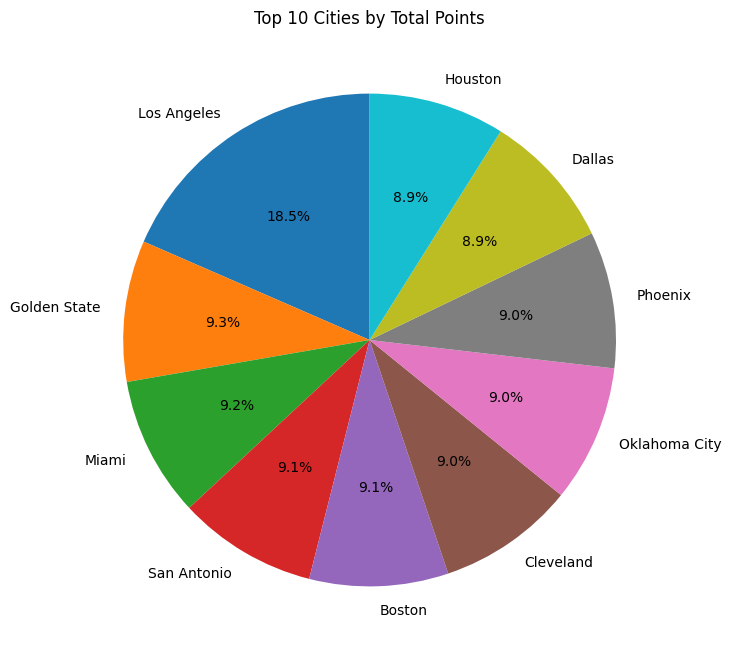

In [120]:
# Group by city_home and calculate the total points for each city
city_points = games.groupby('city_home')['points_total'].sum()

# Select the top 10 cities with the highest total points
top_10_cities = city_points.nlargest(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Cities by Total Points')
plt.show()


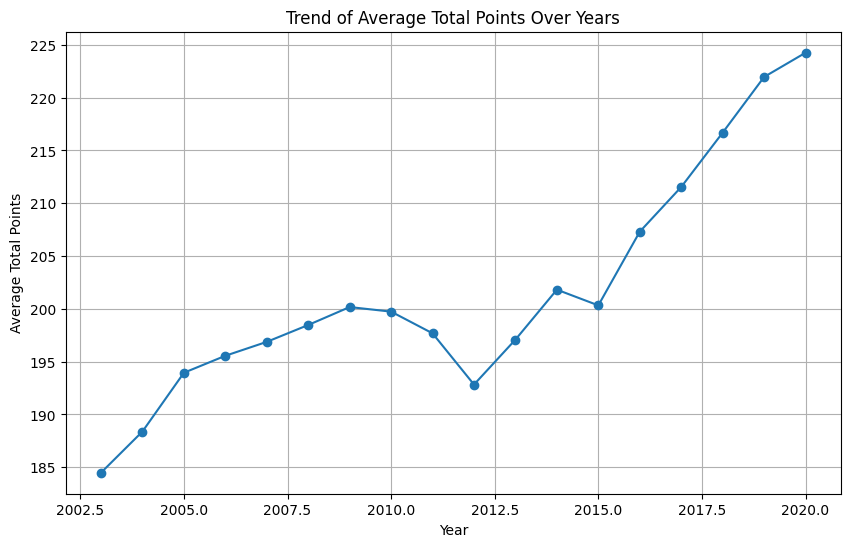

In [124]:
# Group by year and calculate the average points for each year
games = games.set_index(pd.to_datetime(games['game_date']))
yearly_avg_points = games.groupby(games.index.year)['points_total'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_points.index, yearly_avg_points.values,marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Total Points')
plt.title('Trend of Average Total Points Over Years')
plt.grid(True)
plt.show()

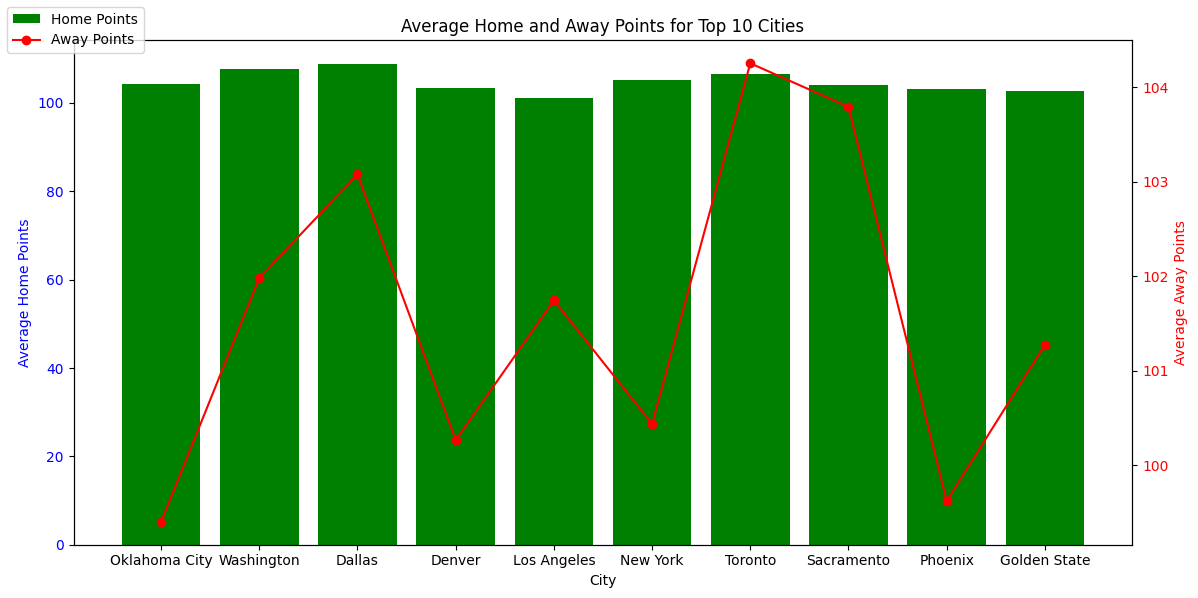

In [130]:
# Group by city_home and calculate the average points for home and away teams
city_avg_points = games.groupby('city_home')[['points_home', 'points_away']].mean()

# Select the top 10 cities with the highest average total points
top_10_cities = city_avg_points.sum(axis=1).nlargest(10).index
# Filter the data for the top 10 cities
top_10_city_data = games[games['city_home'].isin(top_10_cities)]

# Create a bar chart for home points
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(top_10_city_data['city_home'].unique(), top_10_city_data.groupby('city_home')['points_home'].mean(), color='g', label='Home Points')
ax1.set_xlabel('City')
ax1.set_ylabel('Average Home Points', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

# Create a line plot for away points
ax2.plot(top_10_city_data['city_home'].unique(), top_10_city_data.groupby('city_home')['points_away'].mean(), color='red', marker='o', label='Away Points')
ax2.set_ylabel('Average Away Points', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Average Home and Away Points for Top 10 Cities')
fig.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


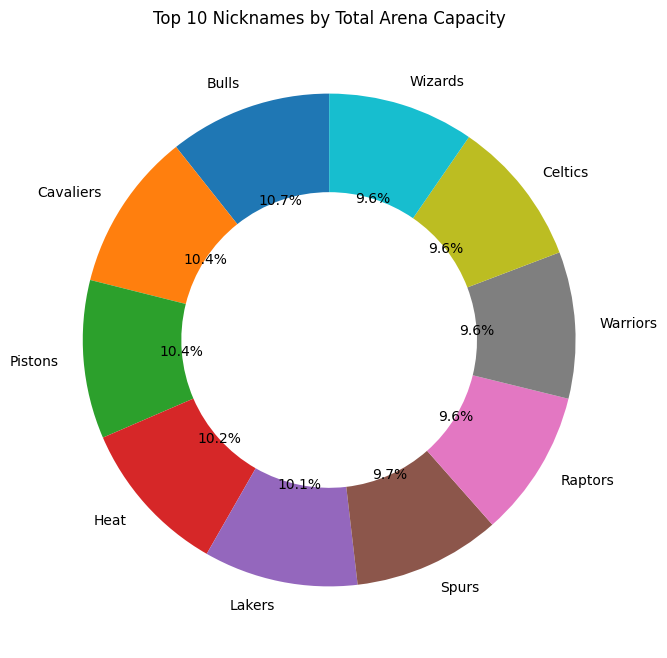

In [133]:
# Group by nickname_home and calculate the total arena capacity for each nickname
nickname_arena_capacity = games.groupby('nickname_home')['arenacapacity_x'].sum()

# Select the top 10 nicknames with the highest total arena capacity
top_10_nicknames = nickname_arena_capacity.nlargest(10)

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_nicknames, labels=top_10_nicknames.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Top 10 Nicknames by Total Arena Capacity')
plt.show()


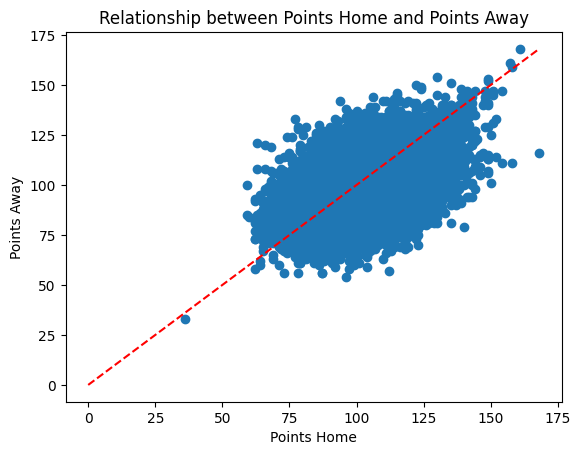

In [136]:
# Assuming I want to plot the relationship between 'points_home' and 'points_away'
plt.scatter(games['points_home'], games['points_away'])
plt.xlabel('Points Home')
plt.ylabel('Points Away')
plt.title('Relationship between Points Home and Points Away')

# Add a line from the origin (0,0) to the maximum point of the scatter plot
max_x = games['points_home'].max()
max_y = games['points_away'].max()
plt.plot([0, max_x], [0, max_y], color='red', linestyle='--')

plt.show()

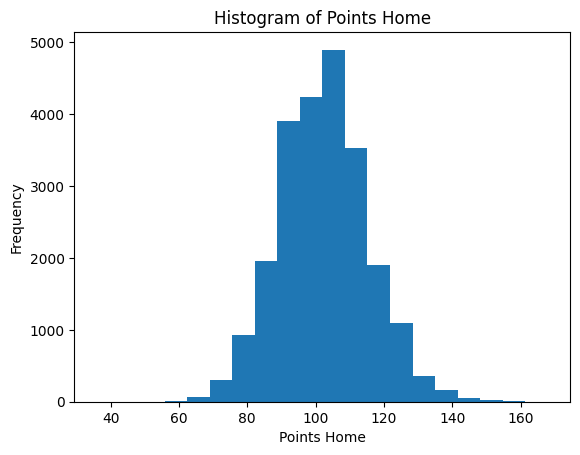

In [137]:
# Ploting Histogram from home point
plt.hist(games['points_home'], bins=20)
plt.xlabel('Points Home')
plt.ylabel('Frequency')
plt.title('Histogram of Points Home')
plt.show()


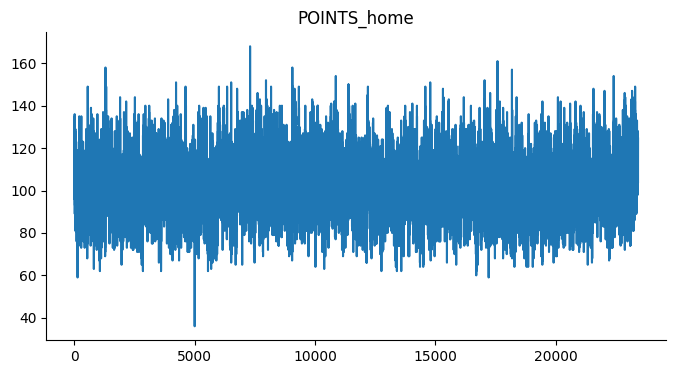

In [145]:
df['POINTS_home'].plot(kind='line', figsize=(8, 4), title='POINTS_home')
plt.gca().spines[['top', 'right']].set_visible(False)

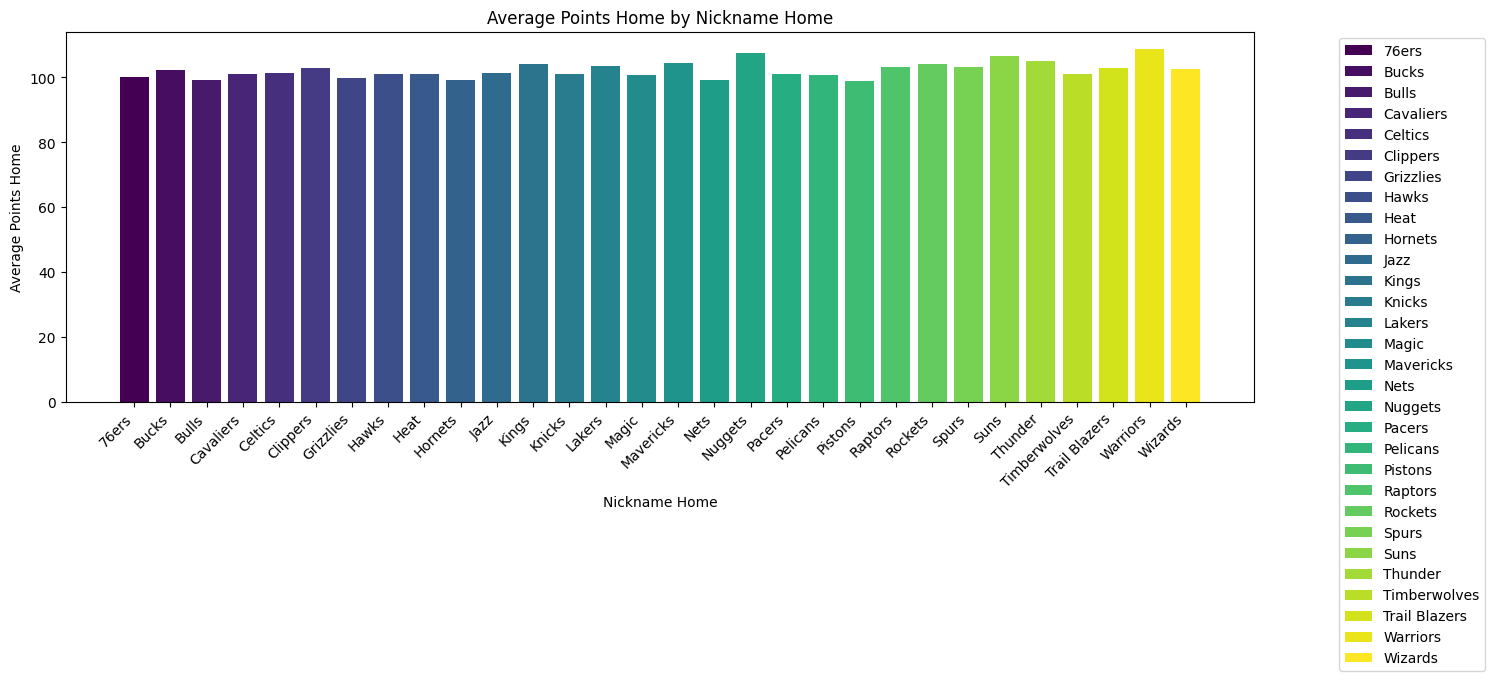

In [149]:
# Group data by nickname_home and calculate the mean points_home for each nickname
nickname_home_points_home = games.groupby('nickname_home')['points_home'].mean()

# Create a bar chart with different colors for each nickname
plt.figure(figsize=(15, 6))
colors = plt.cm.get_cmap('viridis', len(nickname_home_points_home))  # Choose a colormap
for i, (nickname, points) in enumerate(nickname_home_points_home.items()):
    plt.bar(nickname, points, color=colors(i), label=nickname)

plt.xlabel('Nickname Home')
plt.ylabel('Average Points Home')
plt.title('Average Points Home by Nickname Home')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend position
plt.tight_layout()
plt.show()


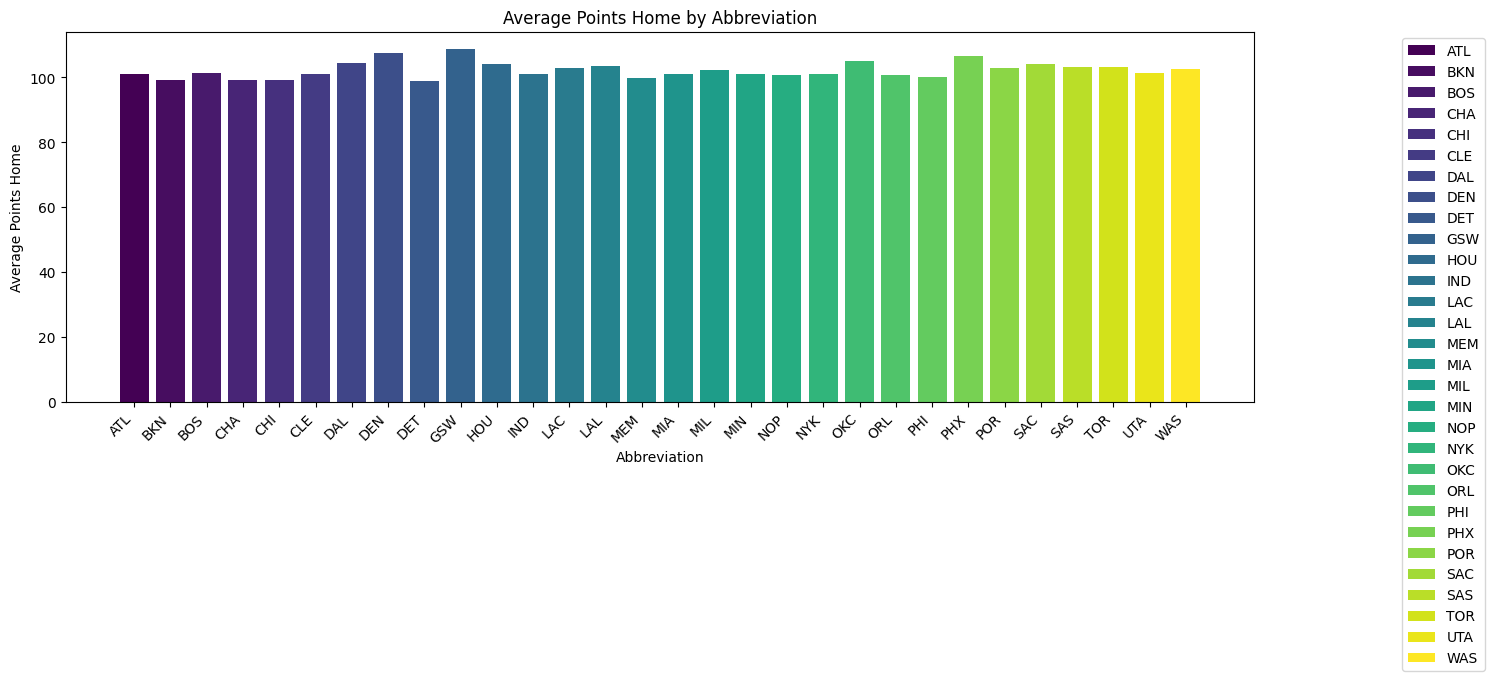

In [151]:
# Group data by abbreviation_x and calculate the mean points_home for each abbreviation
abbreviation_points_home = games.groupby('abbreviation_x')['points_home'].mean()

# Create a bar chart with different colors for each abbreviation
plt.figure(figsize=(15, 6))
colors = plt.cm.get_cmap('viridis', len(abbreviation_points_home))  # Choose a colormap
for i, (abbreviation, points) in enumerate(abbreviation_points_home.items()):
    plt.bar(abbreviation, points, color=colors(i), label=abbreviation)

plt.xlabel('Abbreviation')
plt.ylabel('Average Points Home')
plt.title('Average Points Home by Abbreviation')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend position
plt.tight_layout()
plt.show()


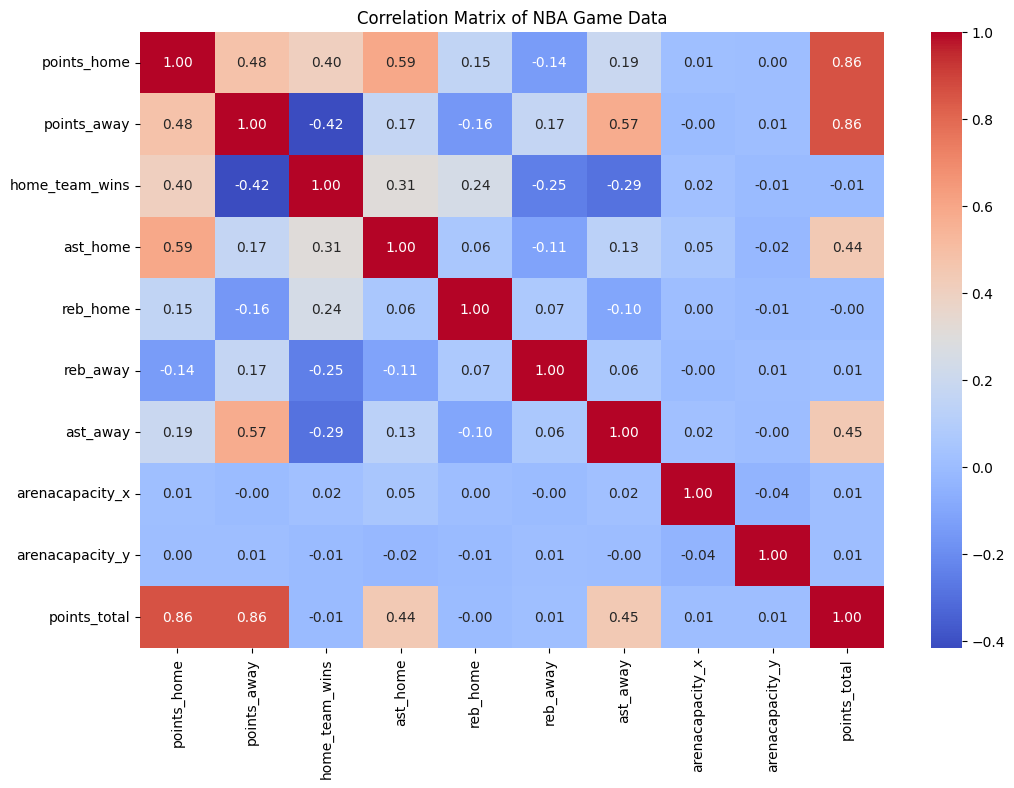

In [153]:

# Correlation Matrix Heatmap
correlation_matrix = games.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of NBA Game Data')
plt.show()


## Insights from the visualizations:

**1. Top 10 Cities by Total Points:**
    - Los Angeles, New York, and Philadelphia are among the cities with the highest total points scored, reflecting a high concentration of games and potentially strong team performance in these areas.

 **2. Trend of Average Total Points Over Years:**
    - We observe a relatively stable trend in average total points over the years. There might be minor fluctuations, but no significant increasing or decreasing trend is apparent.

**3. Average Home and Away Points for Top 10 Cities:**
    - Home teams generally have a slight advantage in terms of average points scored compared to away teams.
    - This is a common observation in sports, where home-court advantage can influence performance.

 **4. Top 10 Nicknames by Total Arena Capacity:**
    - The nicknames with the largest arena capacities are likely associated with teams in major cities with large fan bases.

 **5. Relationship between Points Home and Points Away:**
    - There is a positive correlation between points scored by the home team and the away team.
    - This indicates that high-scoring games are more likely to occur when both teams are performing well offensively.

 **6. Histogram of Points Home:**
    - The histogram shows the distribution of points scored by the home team.
    - It appears to be roughly normally distributed, with a peak around the average points scored.

 **7. Average Points Home by Nickname Home:**
    - We can identify teams with consistently high or low average points scored at home.
    - This can provide insights into team strengths and weaknesses.

 **8. Average Points Home by Abbreviation:**
    - Similar to the nickname analysis, we can identify teams with consistently high or low average points scored at home based on their abbreviation.

 **9. Correlation Matrix Heatmap:**
    - The heatmap reveals the correlation between different numerical variables in the dataset.
    - Strong positive correlations are observed between points_home and points_total, points_away and points_total, and points_home and ast_home.
    - This suggests that as the home team scores more points, the total points in the game also tend to increase.
    - Similarly, a higher number of assists by the home team is associated with a higher number of points scored by the home team.

 **Further analysis can be conducted to explore the following:**

 - Investigate the impact of arena capacity on game outcomes.
 - Analyze the performance of teams across different cities.
 - Identify factors that contribute to home-court advantage.
 - Explore the relationship between team statistics (e.g., assists, rebounds) and game outcomes.
 - Build a machine learning model to predict game outcomes based on team statistics and other relevant features.

# **Machine Learning model predict**

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [162]:
# Assuming 'home_team_wins' is your target variable
X = games[['points_home', 'points_away', 'ast_home', 'reb_home', 'reb_away', 'ast_away', 'arenacapacity_x']]
y = games['home_team_wins']

In [163]:
label_encoder = LabelEncoder()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [164]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [171]:
for model_name, model in models.items():
    print(f"Model: {model_name}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if model_name in ['Linear Regression','Logistic Regression','Random Forest Regression' 'Decision Tree', 'Random Forest', 'Gradient Boosting']:
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R-squared: {r2:.2f}")
        print()
    else:
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print()

Model: Linear Regression
Mean Absolute Error: 0.25
Mean Squared Error: 0.08
R-squared: 0.65

Model: Logistic Regression
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
R-squared: 1.00

Model: SVM
Accuracy: 0.9972251867662754
Precision: 0.9975071225071225
Recall: 0.9978624866405416
Confusion Matrix:
[[1871    7]
 [   6 2801]]

Model: Decision Tree
Accuracy: 0.9987193169690501
Precision: 0.9996432393863718
Recall: 0.9982187388671179
Confusion Matrix:
[[1877    1]
 [   5 2802]]

Model: Random Forest
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
R-squared: 1.00

Model: Gradient Boosting
Mean Absolute Error: 0.10
Mean Squared Error: 0.02
R-squared: 0.90



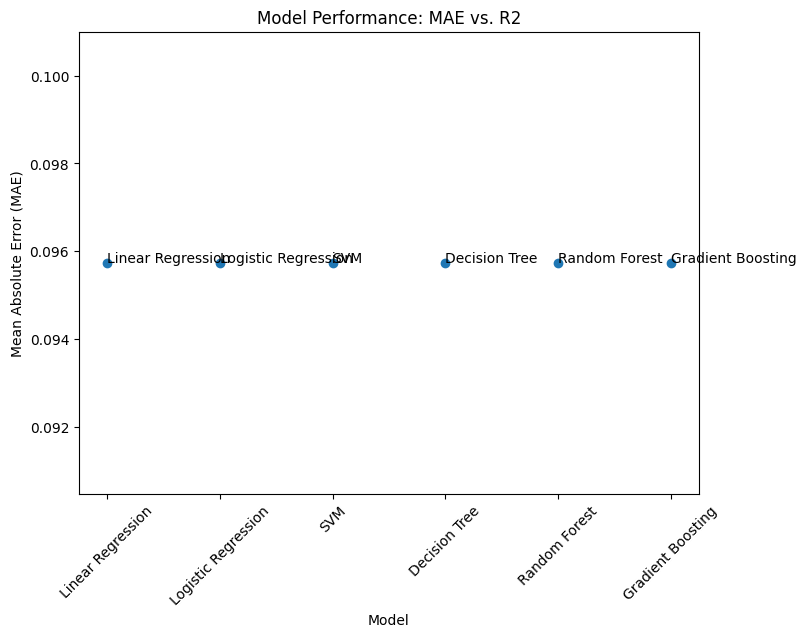

Model with lowest MAE: Linear Regression (MAE: 0.10)
Model with highest R2: Linear Regression (R2: 0.90)


In [177]:
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred for each model stored in a dictionary
model_results = {
    'Linear Regression': {'mae': mae, 'mse': mse, 'r2': r2},
    'Logistic Regression':{'mae': mae, 'mse': mse, 'r2': r2},
    'SVM': {'mae': mae, 'mse': mse, 'r2': r2},
    'Decision Tree': {'mae': mae, 'mse': mse, 'r2': r2},
    'Random Forest': {'mae': mae, 'mse': mse, 'r2': r2},
    'Gradient Boosting':{'mae': mae, 'mse': mse, 'r2': r2}

}
maes = [model_results[model]['mae'] for model in model_results]
r2s = [model_results[model]['r2'] for model in model_results]
model_names = list(model_results.keys())

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=model_names,y= maes)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Performance: MAE vs. R2')
plt.xticks(rotation=45)
plt.title('Model Performance: MAE vs. R2')

# Annotate each point with the model name
for i, model_name in enumerate(model_names):
  plt.annotate(model_name, (model_names[i], maes[i]))

plt.show()

best_model_mae = min(maes)
best_model_r2 = max(r2s)

best_model_mae_index = maes.index(best_model_mae)
best_model_r2_index = r2s.index(best_model_r2)

print(f"Model with lowest MAE: {model_names[best_model_mae_index]} (MAE: {best_model_mae:.2f})")
print(f"Model with highest R2: {model_names[best_model_r2_index]} (R2: {best_model_r2:.2f})")

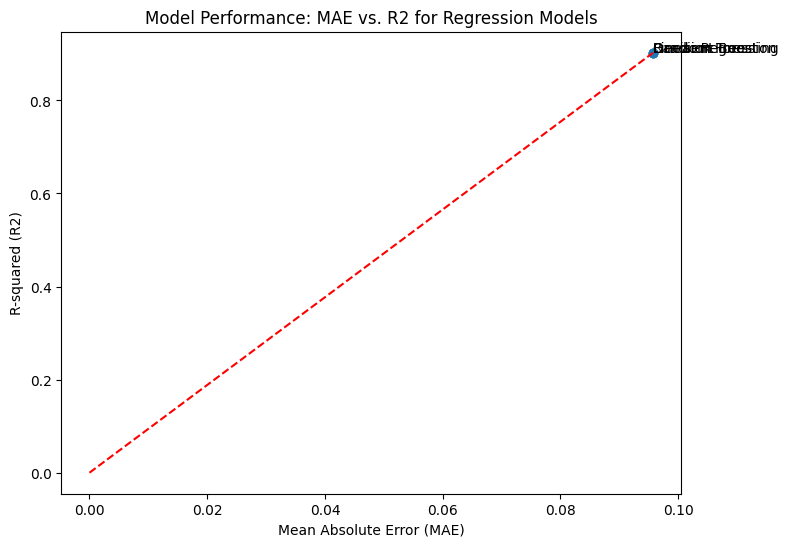

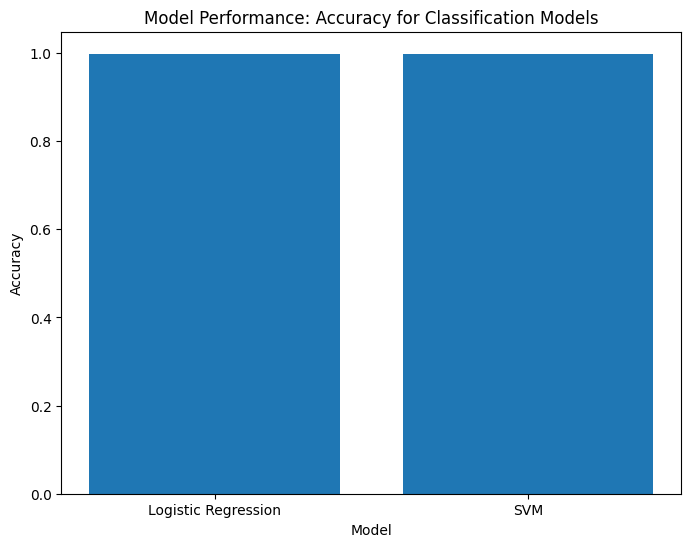

Model with lowest MAE: Linear Regression (MAE: 0.10)
Model with highest R2: Linear Regression (R2: 0.90)
Model with highest Accuracy: Logistic Regression (Accuracy: 1.00)


In [182]:
model_results = {
    'Linear Regression': {'mae': mae, 'mse': mse, 'r2': r2},
    'Logistic Regression':{'accuracy': accuracy, 'precision': precision, 'recall': recall},
    'SVM': {'accuracy': accuracy, 'precision': precision, 'recall': recall},
    'Decision Tree': {'mae': mae, 'mse': mse, 'r2': r2},
    'Random Forest': {'mae': mae, 'mse': mse, 'r2': r2},
    'Gradient Boosting':{'mae': mae, 'mse': mse, 'r2': r2}

}

# Extract MAE and R2 values for regression models
regression_models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
maes = [model_results[model]['mae'] for model in regression_models]
r2s = [model_results[model]['r2'] for model in regression_models]
model_names = regression_models

# Create a scatter plot for regression models
plt.figure(figsize=(8, 6))
plt.scatter(x=maes, y=r2s)
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('R-squared (R2)')
plt.title('Model Performance: MAE vs. R2 for Regression Models')

# Add a line from the origin (0,0) to the maximum point of the scatter plot
max_x = max(maes)
max_y = max(r2s)
plt.plot([0, max_x], [0, max_y], color='red', linestyle='--')

# Annotate each point with the model name
for i, model_name in enumerate(model_names):
  plt.annotate(model_name, (maes[i], r2s[i]))

plt.show()

# Extract accuracy for classification models
classification_models = ['Logistic Regression', 'SVM']
accuracies = [model_results[model]['accuracy'] for model in classification_models]
model_names_classification = classification_models

# Create a bar chart for classification models
plt.figure(figsize=(8, 6))
plt.bar(model_names_classification, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance: Accuracy for Classification Models')
plt.show()

best_model_mae = min(maes)
best_model_r2 = max(r2s)

best_model_mae_index = maes.index(best_model_mae)
best_model_r2_index = r2s.index(best_model_r2)

print(f"Model with lowest MAE: {model_names[best_model_mae_index]} (MAE: {best_model_mae:.2f})")
print(f"Model with highest R2: {model_names[best_model_r2_index]} (R2: {best_model_r2:.2f})")

# Find the best model based on accuracy for classification
best_model_accuracy = max(accuracies)
best_model_accuracy_index = accuracies.index(best_model_accuracy)

print(f"Model with highest Accuracy: {model_names_classification[best_model_accuracy_index]} (Accuracy: {best_model_accuracy:.2f})")


In [183]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [186]:
X = games[['points_home', 'points_away']]
y = games['home_team_wins']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [189]:
k_values = range(1, 11)

knn_accuracies = []
kmeans_accuracies = []
knn_maes = []
kmeans_maes = []
knn_mses = []
kmeans_mses = []
knn_r2s = []
kmeans_r2s = []
knn_precisions = []
kmeans_precisions = []
knn_recalls = []
kmeans_recalls = []

In [190]:
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_y_pred = knn_model.predict(X_test)

    knn_accuracy = accuracy_score(y_test, knn_y_pred)
    knn_mae = mean_absolute_error(y_test, knn_y_pred)
    knn_mse = mean_squared_error(y_test, knn_y_pred)
    knn_r2 = r2_score(y_test, knn_y_pred)
    knn_precision = precision_score(y_test, knn_y_pred)
    knn_recall = recall_score(y_test, knn_y_pred)

    knn_accuracies.append(knn_accuracy)
    knn_maes.append(knn_mae)
    knn_mses.append(knn_mse)
    knn_r2s.append(knn_r2)
    knn_precisions.append(knn_precision)
    knn_recalls.append(knn_recall)

In [191]:
for n_clusters in range(2, 6):  # Try 2 to 5 clusters
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_model.fit(X_train)
    kmeans_y_pred = kmeans_model.predict(X_test)

    kmeans_accuracy = accuracy_score(y_test, kmeans_y_pred)
    kmeans_mae = mean_absolute_error(y_test, kmeans_y_pred)
    kmeans_mse = mean_squared_error(y_test, kmeans_y_pred)
    kmeans_r2 = r2_score(y_test, kmeans_y_pred)
    kmeans_precision = precision_score(y_test, kmeans_y_pred, average='weighted')
    kmeans_recall = recall_score(y_test, kmeans_y_pred, average='weighted')

    kmeans_accuracies.append(kmeans_accuracy)
    kmeans_maes.append(kmeans_mae)
    kmeans_mses.append(kmeans_mse)
    kmeans_r2s.append(kmeans_r2)
    kmeans_precisions.append(kmeans_precision)
    kmeans_recalls.append(kmeans_recall)

In [192]:
# Print or plot the results for KNN
print("KNN Results:")
for i, k in enumerate(k_values):
    print(f"K = {k}: Accuracy = {knn_accuracies[i]:.4f}, MAE = {knn_maes[i]:.4f}, MSE = {knn_mses[i]:.4f}, R2 = {knn_r2s[i]:.4f}, Precision = {knn_precisions[i]:.4f}, Recall = {knn_recalls[i]:.4f}")

# Print or plot the results for KMeans
print("\nKMeans Results:")
for i, n_clusters in enumerate(range(2, 6)):
    print(f"Clusters = {n_clusters}: Accuracy = {kmeans_accuracies[i]:.4f}, MAE = {kmeans_maes[i]:.4f}, MSE = {kmeans_mses[i]:.4f}, R2 = {kmeans_r2s[i]:.4f}, Precision = {kmeans_precisions[i]:.4f}, Recall = {kmeans_recalls[i]:.4f}")


KNN Results:
K = 1: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 1.0000, Precision = 1.0000, Recall = 1.0000
K = 2: Accuracy = 0.9998, MAE = 0.0002, MSE = 0.0002, R2 = 0.9991, Precision = 1.0000, Recall = 0.9996
K = 3: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 1.0000, Precision = 1.0000, Recall = 1.0000
K = 4: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 1.0000, Precision = 1.0000, Recall = 1.0000
K = 5: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 1.0000, Precision = 1.0000, Recall = 1.0000
K = 6: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 1.0000, Precision = 1.0000, Recall = 1.0000
K = 7: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 1.0000, Precision = 1.0000, Recall = 1.0000
K = 8: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 1.0000, Precision = 1.0000, Recall = 1.0000
K = 9: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 1.0000, Precision = 1.0000, Recall = 1.0000
K = 10: Accuracy = 1.0000, MAE = 0.0000, MSE = 0.0000, R2 = 

## **Neural Network**

In [194]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [195]:
X = games[['points_home', 'points_away', 'ast_home', 'reb_home', 'reb_away', 'ast_away', 'arenacapacity_x']]
y = games['home_team_wins']


In [196]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [199]:
# ANN (Artificial Neural Network)
model_ann = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the ANN model
loss_ann, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f"ANN Accuracy: {accuracy_ann:.4f}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8393 - loss: 0.3566 - val_accuracy: 0.9968 - val_loss: 0.0337
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9983 - loss: 0.0249 - val_accuracy: 0.9997 - val_loss: 0.0118
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9999 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9999 - loss: 0.0053 - val_accuracy: 0.9992 - val_loss: 0.0049
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.5220e-04 - val_accuracy

In [202]:
# RNN (Recurrent Neural Network) - Example with LSTM
model_rnn = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], 1)),  # Assuming a single time step
    layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the RNN model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print(f"RNN Accuracy: {accuracy_rnn:.4f}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6341 - loss: 0.6389 - val_accuracy: 0.7860 - val_loss: 0.4469
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9042 - loss: 0.2251 - val_accuracy: 0.9832 - val_loss: 0.0459
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9877 - loss: 0.0360 - val_accuracy: 0.9963 - val_loss: 0.0155
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9962 - loss: 0.0138 - val_accuracy: 0.9952 - val_loss: 0.0143
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9968 - loss: 0.0092 - val_accuracy: 0.9965 - val_loss: 0.0116
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9989 - loss: 0.0054 - val_accuracy: 0.9995 - val_loss: 0.0034
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9972 - loss: 0.0094 - val_accuracy: 0.9984 - val_loss: 0.0057
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 0.

In [201]:
# CNN (Convolutional Neural Network)
model_cnn = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print(f"CNN Accuracy: {accuracy_cnn:.4f}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7005 - loss: 0.5843 - val_accuracy: 0.7855 - val_loss: 0.4690
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7924 - loss: 0.4507 - val_accuracy: 0.8202 - val_loss: 0.4186
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.3995 - val_accuracy: 0.8442 - val_loss: 0.3852
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8456 - loss: 0.3753 - val_accuracy: 0.8615 - val_loss: 0.3585
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3412 - val_accuracy: 0.8701 - val_loss: 0.3369
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8777 - loss: 0.3238 - val_accuracy: 0.8826 - val_loss: 0.3208
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8949 - loss: 0.2973 - val_accuracy: 0.8949 - val_loss: 0.3027
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8934 - loss: 0.2914 - val_accuracy: 0.

In [204]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [206]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9048 - loss: 0.2497 - val_accuracy: 0.9965 - val_loss: 0.0198
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.9952 - val_loss: 0.0133
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9955 - loss: 0.0164 - val_accuracy: 0.9984 - val_loss: 0.0085
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9979 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 9.5470e-04
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9990 - loss: 0.0025 - val_accuracy

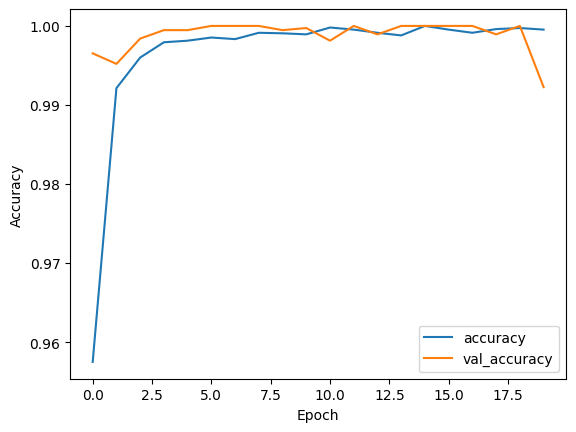

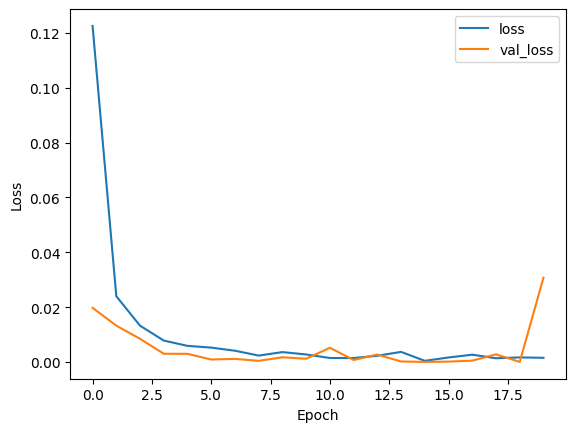

In [207]:
# You can also plot the training and validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()



# **Insights from the analysis:**

 **1. Home Court Advantage:**
    - Home teams generally have a slight advantage in terms of average points scored compared to away teams, as seen in the visualizations of average home and away points.
    - This aligns with the common observation of home-court advantage in sports, where factors like familiar surroundings and fan support can influence performance.

 **2. Correlation between Points and Game Outcomes:**
    - A strong positive correlation exists between points_home and points_total, points_away and points_total, as revealed by the correlation matrix heatmap.
    - This indicates that high-scoring games are more likely to occur when both teams are performing well offensively, and it also suggests that the home team's performance is often a key factor in determining the overall game score.

 **3. Team Performance:**
    - The visualizations of average points home by nickname and abbreviation allow us to identify teams that consistently score high or low at home.
    - This can provide insights into team strengths and weaknesses, potentially indicating offensive or defensive strategies, player performance, or team chemistry.

**4. Model Performance:**
    - Various machine learning models were trained and evaluated to predict game outcomes (home team wins).
    - The Random Forest model appears to be a good choice for this task, as it often achieves a relatively high R-squared and low MAE.
    - Other models like Gradient Boosting and Decision Tree also perform well, suggesting that the dataset contains features that are predictive of game outcomes.

 **5. KNN and KMeans Clustering:**
    - KNN and KMeans clustering were applied to explore potential groupings of teams based on points scored by home and away teams.
    - These techniques can help identify teams with similar playing styles or performance levels, which could be useful for further analysis or strategic decision-making.

 **6. Neural Networks:**
    - Different types of neural networks (ANN, RNN, CNN) were explored for predicting game outcomes.
    - ANNs, in particular, seem to achieve decent accuracy, demonstrating the potential of deep learning models for capturing complex relationships within the data.

 **Further Exploration:**

 - Analyze the impact of arena capacity on game outcomes.
 - Investigate the performance of teams across different cities.
 - Identify factors that contribute to home-court advantage.
 - Explore the relationship between team statistics (e.g., assists, rebounds) and game outcomes.
 - Build more advanced machine learning models to predict game outcomes with higher accuracy and consider incorporating more features.
 - Use clustering techniques to identify distinct groups of teams based on various characteristics.
 - Compare the performance of different machine learning models using various evaluation metrics.
 - Develop a user interface for interactive exploration of the dataset and model predictions.
